![](https://www.u-tokyo.ac.jp/content/400141878.png)

# **About This Dataset**
> With rise of social media coupled with the Covid-19 pandemic, cyberbullying has reached all time highs. We can combat this by creating models to automatically flag potentially harmful tweets as well as break down the patterns of hatred.

> As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity
> of the internet makes such personal attacks more difficult to stop than traditional bullying.

> On April 15th, 2020, UNICEF issued a warning in response to the increased risk of cyberbullying during the COVID-19 pandemic due to widespread school closures, increased screen time, and decreased face-to-face social interaction. The statistics of cyberbullying are outright alarming: 36.5% of middle and high school students have felt cyberbullied and 87% have observed cyberbullying, with effects ranging from decreased academic performance to depression to suicidal thoughts.

> In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying: Age, Ethnicity, Gender, Religion, Other type of cyberbullying, Not cyberbullying. The data has been balanced in order to contain ~8000 of each class.

> Trigger Warning These tweets either describe a bullying event or are the offense themselves, therefore explore it to the point where you feel comfortable.

# **Task**
1. Create a multiclassification model to predict cyberbullying type;
2. Create a binary classification model to flag potentially harmful tweets;
3. Explore words and patterns associated with each type of cyberbullying.

# **Import Package**

In [1]:
# if afinn modulue not installed
! pip install afinn

     |████████████████████████████████| 52 kB 464 kB/s             
  Preparing metadata (setup.py) ... - done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=bd07d2e902c742618d0f70bad307465746f0132c74e61403ff909efe3ba44b68
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [2]:
# im using sklearn version 1.0.2
! pip uninstall scikit-learn -y

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2


In [3]:
pip install scikit-learn

     |████████████████████████████████| 24.8 MB 884 kB/s            
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.2 which is incompatible.
featuretools 1.4.0 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from collections import Counter
import plotly.graph_objects as go
import collections
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import emoji
import regex
import itertools
import re
from matplotlib.image import imread
from afinn import Afinn
afinn = Afinn(language='en')
import plotly.express as px

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tensorflow.keras.backend import clear_session
import tensorflow

# **Defining Class**

In [5]:
class TwitterCyberBullying:
    
    DataFrameDirectory = '../input/cyberbullying-classification/cyberbullying_tweets.csv'
    TweetColumns = 'tweet_text'
    LabelColumns = 'cyberbullying_type'
    LabelColumnsEncoded = 'cyberbullying_type_encoding'

    TrainSenctence = None
    TestSentence = None
    TrainY = None
    TestY = None

    LogisticRegressionModel_ = None
    XGBClassifierModel_ = None
    NaiveBayesClassifier_ = None
    NeuralNetworkModel_ = None

    Vectorizer_ = None
    LabelMapping_ = None

    def __init__(self):

        pass

    @classmethod
    def UpdateVariableVectorized(cls, TrainSentence, TestSentence, TrainY, TestY):
        cls.TrainSenctence = TrainSentence    
        cls.TestSentence = TestSentence
        cls.TrainY = TrainY
        cls.TestY = TestY

    @classmethod
    def UpdateModel(cls, ModelName, Model):
        if ModelName == 'Logistic Regression':
            cls.LogisticRegressionModel_ = Model
        if ModelName == 'XGB Classifier':
            cls.XGBClassifierModel_ = Model
        if ModelName == 'Naive Bayes Classifier':
            cls.NaiveBayesClassifier_ = Model
        if ModelName == 'Neural Network':
            cls.NeuralNetworkModel_ = Model

    @classmethod
    def UpdateVectorizer(cls, Vectorizer):
        cls.Vectorizer_ = Vectorizer

    @classmethod
    def UpdateLabelMapping(cls, LabelDict):
        cls.LabelMapping_ = LabelDict

    # Reading CSV
    def ReadingData(self):
        return pd.read_csv(TwitterCyberBullying.DataFrameDirectory)

    # Data Shape
    def KnowingShape(self):
        Rows = self.ReadingData().shape[0]
        Cols = self.ReadingData().shape[1]

        print(f'Total Rows: {Rows}')
        print(f'Total Cols: {Cols}') 

        pass 
    
    # Label Counter
    def LabelUnique(self):
        Label = self.ReadingData()[TwitterCyberBullying.LabelColumns]
        return Counter(Label)

    # Parsing Lable
    def ParsingLable(self):

        Label = []
        Values = []

        for i in self.LabelUnique().keys():
            Label.append(i)

        for i in self.LabelUnique().values():
            Values.append(i)

        return Label, Values

    # Bar Update Figure
    def BarUpdateFigure(self, Fig, Title):
        return Fig['layout'].update(
#                              height=300, 
#                              width=500,
                             showlegend=False,
                             uniformtext_minsize=12,
                             uniformtext_mode='hide',
                             title=Title,
#                              plot_bgcolor='rgba(0,0,0,0)',
#                              paper_bgcolor='rgba(0,0,0,0)',
                             legend_title= ' ',
                             font=dict(
                                       family="Old Standard TT, serif'",
                                       size=12,
                                       color="black"))

    # Baru Update Trace
    def BarUpdateTrace(self, Fig):
        Fig.for_each_xaxis(lambda axis: axis.title.update(font=dict(size=3)))
        Fig.for_each_yaxis(lambda axis: axis.title.update(font=dict(size=3)))
        
        # Fig.update_layout(yaxis_range=[-5,180])

        Fig.update_xaxes(showgrid=False)
        Fig.update_yaxes(showgrid=False)

        pass

    # Pie Update Trace
    def PieUpdateTrace(self, Fig):
        return Fig.update_traces(textposition='inside')

    # Pie Update Figure
    def PieUpdateFigure(self, Fig, Title, Legend):
        return Fig.update_layout(uniformtext_minsize = 12, 
                                 uniformtext_mode = 'hide',
#                                  height = 300, 
#                                  width = 500, 
                                 title = Title,
#                                  plot_bgcolor = 'rgba(0,0,0,0)',
#                                  paper_bgcolor = 'rgba(0,0,0,0)',
                                 font=dict(family = "Old Standard TT, serif'",
                                           size = 12,
                                           color = "black"),
                                 legend_title = Legend)

    # Pie Label Distribution
    def DisplayPieChartLabel(self):
        Label, Values = self.ParsingLable()
        fig = go.Figure(data=[go.Pie(labels=Label, values=Values)])

        self.PieUpdateTrace(fig)
        self.PieUpdateFigure(fig, 'Label Distribution', 'Label:')

        return fig.show()

    # Getting Twitter in a List
    def GetListOfAllTweet(self):
        AllTweet = self.ReadingData()[TwitterCyberBullying.TweetColumns]
        AllTweet = AllTweet.tolist()

        return AllTweet

    # Get Username
    def GetAttribute(self, String):

        Attribute = []
        for i in self.GetListOfAllTweet():
            Text = i.split()
            for j in Text:
                if j.startswith(String):
                    Attribute.append(j)
                                    
        return Attribute

    # Username Counter
    def UsernameCounter(self):
        return Counter(self.GetAttribute('@'))

    # Hastag Counter
    def HashtagCounter(self):
        return Counter(self.GetAttribute('#'))

    # Parsing Username Count
    def ParsingUsernameCount(self):

        Label = []
        Values = []

        for i in self.UsernameCounter().keys():
            Label.append(i)

        for i in self.UsernameCounter().values():
            Values.append(i)

        return Label, Values        

    # Parsing Hashtaf Count
    def ParsingHashTagCount(self):

        Label = []
        Values = []

        for i in self.HashtagCounter().keys():
            Label.append(i)

        for i in self.HashtagCounter().values():
            Values.append(i)

        return Label, Values                

    # Creating Dataframe From List
    def DataFrameFromList(self, List, ColumnsName):
        return pd.DataFrame(List, index = ColumnsName).T

    # Dataframe Contain Username and Count
    def CountUsernameDataFrame(self):
        Label, Values = self.ParsingUsernameCount()
        DataFrame = self.DataFrameFromList([Label, Values], ['Username', 'Count'])
        DataFrame = DataFrame.sort_values(by='Count', ascending=False)

        return DataFrame

    # Dataframe Contain Username and Count
    def CountHastagDataframe(self):
        Label, Values = self.ParsingHashTagCount()
        DataFrame = self.DataFrameFromList([Label, Values], ['Hashtag', 'Count'])
        DataFrame = DataFrame.sort_values(by='Count', ascending=False)

        return DataFrame

    # X conversion for single columns clustering
    def ArrayForCluster(self, XValues):
        X = np.array(XValues)
        X = X.reshape(-1,1)
        return X

    # Within Cluster Sum of Square searching
    def ClusterSearching(self, Values):

        WithinClusterSumOfSquare = []

        for i in range(1,10):
            KMeans_ = KMeans(i)
            KMeans_.fit(Values)
            WCSSIter = KMeans_.inertia_
            WithinClusterSumOfSquare.append(WCSSIter)   

        return WithinClusterSumOfSquare     

    # Plot elblow for optimal number of cluster username count
    def ElbowClusterUsernameCount(self):
        Values = self.ClusterSearching(self.ArrayForCluster(self.CountUsernameDataFrame()['Count']))
        ClusterNumber = range(1,10)
        plt.plot(ClusterNumber,Values)
        plt.title('Elbow Cluster of Username Count')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')

        return plt.plot()

    # Plot elblow for optimal number of cluster hastag count
    def ElbowClusterHashtagCount(self):
        Values = self.ClusterSearching(self.ArrayForCluster(self.CountHastagDataframe()['Count']))
        ClusterNumber = range(1,10)
        plt.plot(ClusterNumber,Values)
        plt.title('Elbow Cluster of Hashtag Count')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')

        return plt.plot()

    # K Means Initiator
    def KMeansInitiator(self, NumberOfCluster, Values):
        KMeans_ = KMeans(NumberOfCluster)
        KMeans_.fit(Values)

        return KMeans_

    # Clustering Username Count
    def CountUsernameDataFrameWithCluster(self):
        Dataframe = self.CountUsernameDataFrame()
        Values = self.ArrayForCluster(Dataframe['Count'])

        Dataframe['Cluster'] = self.KMeansInitiator(4, Values).predict(Values)

        return Dataframe

    # Clustering Hashtag Count
    def CountHashtagDataFrameWithCluster(self):
        Dataframe = self.CountHastagDataframe()
        Values = self.ArrayForCluster(Dataframe['Count'])

        Dataframe['Cluster'] = self.KMeansInitiator(2, Values).predict(Values)

        return Dataframe

    # Username Count Cluster Counter
    def UsernameCountClusterCounter(self):
        return Counter(self.CountUsernameDataFrameWithCluster()['Cluster'])

    # Hashtag Count Cluster Counter
    def HashtagCountClusterCounter(self):
        return Counter(self.CountHashtagDataFrameWithCluster()['Cluster'])

    # Parsing Username Cluster
    def ParsingUsernameCluster(self):

        Label = []
        Values = []

        for i in self.UsernameCountClusterCounter().keys():
            Label.append(i)

        for i in self.UsernameCountClusterCounter().values():
            Values.append(i)

        return Label, Values             

    # Pie Username Cluster Distribution
    def DisplayPieUsernameCluster(self):
        Label, Values = self.ParsingUsernameCluster()
        fig = go.Figure(data=[go.Pie(labels=Label, values=Values)])

        # self.PieUpdateTrace(fig)
        self.PieUpdateFigure(fig, 'Cluster from Username Count Distribution', 'Cluster Count:')

        return fig.show()

    # Top 10 Username Barchart
    def Top10UsernameBar(self):
        DataFrame = self.CountUsernameDataFrame().head(10)
        Label = DataFrame['Username'].tolist()
        Values = DataFrame['Count'].tolist()

        fig = go.Figure(data=[go.Bar(x=Label, y=Values)])

        self.BarUpdateFigure(fig, 'Top 10 Username Appears in Tweet')
        self.BarUpdateTrace(fig)

        return fig.show()        

    # Top 10 Hashtag Barchart
    def Top10Hashtag(self):
        DataFrame = self.CountHastagDataframe().head(10)
        Label = DataFrame['Hashtag'].tolist()
        Values = DataFrame['Count'].tolist()

        fig = go.Figure(data=[go.Bar(x=Label, y=Values)])

        self.BarUpdateFigure(fig, 'Top 10 Hashtag Appears in Tweet')
        self.BarUpdateTrace(fig)

        return fig.show()                

    # Select Rows by Label
    def SlicedDataFrame(self, Class):
        DataFrame = self.ReadingData()
        DataFrame = DataFrame.loc[DataFrame[TwitterCyberBullying.LabelColumns] == Class]        
        return DataFrame

    # Finding Characters
    def SplitCountEmoji(self, Text):
        
        EmojiList = []
        data = regex.findall(r'\X', Text)
        for word in data:
            if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
                EmojiList.append(word)
        
        return EmojiList

    # Finding Emoji
    def FindingEmoji(self):

        Emoji = []

        for i in self.GetListOfAllTweet():

            Emot = self.SplitCountEmoji(i)

            if Emot:
            
                Emoji.append(Emot)

        return list(itertools.chain.from_iterable(Emoji))

    # Counter of Emoji
    def EmojiCounter(self):
        return Counter(self.FindingEmoji())

    # Parsing Emoji
    def ParsingEmoji(self):

        Label = []
        Values = []

        for i in self.EmojiCounter().keys():
            Label.append(i)

        for i in self.EmojiCounter().values():
            Values.append(i)

        return Label, Values                     

    # Pie Emoji Distribution
    def DisplayPieChartEmoji(self):
        Label, Values = self.ParsingEmoji()
        fig = go.Figure(data=[go.Pie(labels=Label, values=Values)])

        self.PieUpdateTrace(fig)
        self.PieUpdateFigure(fig, 'Emoji Distribution', 'Emoji:')

        return fig.show()

    # Count Characters
    def CountTweetCharacters(self):
        DataFrame = self.ReadingData()
        TweetList = DataFrame[TwitterCyberBullying.TweetColumns].to_list()

        CountList = []

        for i in TweetList:
            Count = len(re.findall(r'\w+', i))
            CountList.append(Count)

        return CountList

    # Wrapping Dataframe With Characters Count
    def DataframeWithCharactersCount(self):
        DataFrame = self.ReadingData()
        DataFrame['Count'] = self.CountTweetCharacters()

        return DataFrame

    # This will aggregate 2 colums
    def CharactersCustomAggregation(self, Method):

        custom_aggregation = {}
        custom_aggregation['Count'] = Method
        df = self.DataframeWithCharactersCount().groupby(TwitterCyberBullying.LabelColumns).agg(custom_aggregation)
        df.columns = ['Count']
        df[TwitterCyberBullying.LabelColumns] = df.index    
        df.reset_index(drop=True, inplace=True)
        df = df.sort_values(by='Count', ascending=False)
        return df

    # Characters Method Barplot
    def CharactersBarCustom(self, Method):
        DataFrame = self.CharactersCustomAggregation(Method)
        Label = DataFrame[TwitterCyberBullying.LabelColumns].tolist()
        Values = DataFrame['Count'].tolist()

        fig = go.Figure(data=[go.Bar(x=Label, y=Values)])

        self.BarUpdateFigure(fig, f'Characters {Method} on Tweet Based on Label')
        self.BarUpdateTrace(fig)

        return fig.show()                

    # Checking AfinScore
    def ApplyAfinScore(self):

        DataFrame = self.ReadingData()

        TweetList = DataFrame[TwitterCyberBullying.TweetColumns].to_list()

        AfinScore = []

        for i in TweetList:
            AfinScore.append(afinn.score(i))

        DataFrame['Afin Sentence Score'] = AfinScore
        DataFrame = DataFrame.sort_values(by='Afin Sentence Score', ascending= True)

        return DataFrame

    # Apply Histogram For Afin Score
    def AfinScoreHistogram(self):

        fig = px.histogram(self.ApplyAfinScore(), 
                           x="Afin Sentence Score", 
                           color = 'cyberbullying_type', 
                           opacity=0.5,
                           title="Afin Score Histogram Based on Label")

        fig.update_layout(xaxis=dict(range=[-30, 10]))

        return fig.show()

    # Check Most Toxic Tweet
    def Check2MostToxicTweet(self, Class):

        DataFrame = self.ApplyAfinScore()
        DataFrame = DataFrame.loc[DataFrame['cyberbullying_type'] == Class]
        Tweet = DataFrame['tweet_text'].head(2).tolist()

        Count = 0
        for i in Tweet:

            Count += 1

            print(f'Number {Count} Toxic Tweet by {Class} is: {i}')
            print('')

        pass
    
    # Opening Boundary Wordcloud using PIL
    def OpeningBoundaryWordCloud(self):
        return np.array(Image.open(TwitterCyberBullying.BoundaryWordCloud))

    # Initiate WordCloud
    def WordCloudInitiator(self, Text):

        wc = WordCloud(background_color="white", 
#                        mask= self.OpeningBoundaryWordCloud(),
                       max_words=100, 
                       contour_width=0, 
                       contour_color='firebrick')


        return wc.generate(Text)

    # Visualize WordCloud
    def VisualizeWordCloud(self, Class):

        DataFrame = self.SlicedDataFrame(Class)
        Tweet = " ".join(review for review in DataFrame.tweet_text)

        plt.figure(figsize=[10,100])
        plt.imshow(self.WordCloudInitiator(Tweet), interpolation='bilinear')
        plt.axis("off")

        return plt.show()        

    # Can Remove # @ http    
    def RemovingWordWithSpecialChar(self, DataFrame, StatrsWith):

        Tweet = DataFrame[TwitterCyberBullying.TweetColumns].tolist()

        Count = 0
        CleanedTweet = []
        for i in Tweet:
            Text = i.split()

            Char = []
            for j in Text:

                if j.startswith(StatrsWith):
                    Count += 1
                    pass
                else:
                    Char.append(j)

            Char = ' '.join(str(e) for e in Char)
            CleanedTweet.append(Char)
        
        print(f'Removing {StatrsWith} Total : {Count}')
        DataFrame[TwitterCyberBullying.TweetColumns] = CleanedTweet

        return DataFrame

    # Lower case all the word
    def LowerCasingTweet(self, DataFrame):

        Tweet = DataFrame[TwitterCyberBullying.TweetColumns].tolist()

        CleanedTweet = []
        for i in Tweet:
            Text = i.split()

            Char = []
            for j in Text:
                
                Char.append(j.lower())

            Char = ' '.join(str(e) for e in Char)
            CleanedTweet.append(Char)
                        
        DataFrame[TwitterCyberBullying.TweetColumns] = CleanedTweet

        return DataFrame

    # Remove New Line Characters
    def RemovingNewLineCharacters(self, DataFrame):

        Tweet = DataFrame[TwitterCyberBullying.TweetColumns].tolist()

        CleanedTweet = []

        for i in Tweet:
            CleanedTweet.append(i.strip())

        DataFrame[TwitterCyberBullying.TweetColumns] = CleanedTweet

        return DataFrame

    # Preprocessing Data
    def PreProcessing(self):
        DataFrame = self.ReadingData()
        DataFrame = self.RemovingWordWithSpecialChar(DataFrame, '@')
        DataFrame = self.RemovingWordWithSpecialChar(DataFrame, '#')
        DataFrame = self.RemovingWordWithSpecialChar(DataFrame, 'http')        
        DataFrame = self.RemovingNewLineCharacters(DataFrame)
        DataFrame = self.LowerCasingTweet(DataFrame)             

        return DataFrame   

    # Label Encoding
    def LabelEncoding(self):
        DataFrame = self.PreProcessing()
        LabelEncoder_ = LabelEncoder()

        DataFrame[TwitterCyberBullying.LabelColumnsEncoded] = LabelEncoder_.fit_transform(DataFrame[TwitterCyberBullying.LabelColumns])

        LabelEncoder_.fit(DataFrame[TwitterCyberBullying.LabelColumns])
        LabelMapping = dict(zip(LabelEncoder_.classes_, LabelEncoder_.transform(LabelEncoder_.classes_)))

        self.UpdateLabelMapping(LabelMapping)

        return DataFrame

    # Splitting
    def TrainTestSplitting(self):
        DataFrame = self.LabelEncoding()
        Sentence = DataFrame[TwitterCyberBullying.TweetColumns].values
        Y = DataFrame[TwitterCyberBullying.LabelColumnsEncoded].values

        TrainSentence, TestSentence, TrainY, TestY = train_test_split(Sentence, Y, test_size=0.25, random_state=1000)

        return TrainSentence, TestSentence, TrainY, TestY

    # Vectorizing
    def Vectorizer(self):

        TrainSentence, TestSentence, TrainY, TestY = self.TrainTestSplitting()

        Vectorizer_ = CountVectorizer()
        Vectorizer_.fit(TrainSentence)

        TrainSentence = Vectorizer_.transform(TrainSentence)
        TestSentence  = Vectorizer_.transform(TestSentence)    

        self.UpdateVariableVectorized(TrainSentence, TestSentence, TrainY, TestY)
        self.UpdateVectorizer(Vectorizer_)

        pass
    
    # Calculate Metrics
    def ModelEvaluation(self, YTrue, YTest):
        Accuracy = accuracy_score(YTrue, YTest)
        Precision = precision_score(YTrue, YTest, average='weighted')     
        Recal = recall_score(YTrue, YTest, average='weighted')     
        F1Score = f1_score(YTrue, YTest, average='weighted')

        return Accuracy, Precision, Recal, F1Score

    # Logistic Regression Model
    def LogisticRegressionModel(self):

        Model = LogisticRegression(max_iter=1000)
        Model.fit(TwitterCyberBullying.TrainSenctence, TwitterCyberBullying.TrainY)
        YPred = Model.predict(TwitterCyberBullying.TestSentence)

        Accuracy, Precision, Recal, F1Score = self.ModelEvaluation(TwitterCyberBullying.TestY, YPred)

        self.UpdateModel('Logistic Regression', Model)

        return Accuracy, Precision, Recal, F1Score

    # XGB Classifier Model
    def XGBClassifierModel(self):

        Model = XGBClassifier()
        Model.fit(TwitterCyberBullying.TrainSenctence, TwitterCyberBullying.TrainY)
        YPred = Model.predict(TwitterCyberBullying.TestSentence)

        Accuracy, Precision, Recal, F1Score = self.ModelEvaluation(TwitterCyberBullying.TestY, YPred)

        self.UpdateModel('XGB Classifier', Model)

        return Accuracy, Precision, Recal, F1Score

    # Naive Bayes Classifier Model
    def NaiveBayesClassifier(self):

        Model = MultinomialNB()
        Model.fit(TwitterCyberBullying.TrainSenctence, TwitterCyberBullying.TrainY)
        YPred = Model.predict(TwitterCyberBullying.TestSentence)

        Accuracy, Precision, Recal, F1Score = self.ModelEvaluation(TwitterCyberBullying.TestY, YPred)

        self.UpdateModel('Naive Bayes Classifier', Model)

        return Accuracy, Precision, Recal, F1Score    

    # https://realpython.com/python-keras-text-classification/
    # History Plotting
    def HistoryPlotting(self, history):

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, 'b', label='Training acc')
        plt.plot(x, val_acc, 'r', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, 'b', label='Training loss')
        plt.plot(x, val_loss, 'r', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()        

    # Number of Lable
    def CheckNumberOfLable(self):
        return int(len(self.LabelUnique().keys()))

    # Multilable Additional Step for Neural Network
    def TrainOneHot(self, Data):

        Data = tensorflow.one_hot(Data, depth=self.CheckNumberOfLable())      

        return Data

    # Simple Neural Network Model
    def NeuralNetworkModel(self):

        TrainY = self.TrainOneHot(TwitterCyberBullying.TrainY)
        TestY = self.TrainOneHot(TwitterCyberBullying.TestY)

        InputDimention = TwitterCyberBullying.TrainSenctence.shape[1]

        clear_session()

        model = Sequential()
        model.add(layers.Dense(5, input_dim=InputDimention, activation='relu'))
        model.add(layers.Dense(self.CheckNumberOfLable(), activation='sigmoid'))   

        model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        
        model.summary()             

        history = model.fit(TwitterCyberBullying.TrainSenctence, TrainY,
                            epochs=10,
                            verbose=1,
                            validation_data=(TwitterCyberBullying.TestSentence, TestY),
                            batch_size=10)      

        self.HistoryPlotting(history)

        YPred = model.predict(TwitterCyberBullying.TestSentence)
        YPred = YPred.round()

        Accuracy, Precision, Recal, F1Score = self.ModelEvaluation(TestY, YPred)

        self.UpdateModel('Neural Network', model)        

        return Accuracy, Precision, Recal, F1Score            

    # Model Pipeline
    def ModelPipeline(self):

        self.Vectorizer()

        LogisticRegressionAccuracy, LogisticRegressionPrecision, LogisticRegressionRecal, LogisticRegressionF1Score = self.LogisticRegressionModel()
        XGBClassifierAccuracy, XGBClassifierPrecision, XGBClassifierRecal, XGBClassifierF1Score = self.XGBClassifierModel()
        NaiveBayesAccuracy,  NaiveBayesPrecision,  NaiveBayesRecal,  NaiveBayesF1Score = self.NaiveBayesClassifier()
        NeuralNetworkAccuracy,  NeuralNetworkPrecision,  NeuralNetworkRecal,  NeuralNetworkF1Score = self.NeuralNetworkModel()
        
        Evaluation = {'Model':['Logistic Regression', 'XGB Classifier', 'Naive Bayes Classifier', 'Neural Network'], 
                      'Accuracy':[LogisticRegressionAccuracy, XGBClassifierAccuracy, NaiveBayesAccuracy, NeuralNetworkAccuracy],
                      'Precision':[LogisticRegressionPrecision, XGBClassifierPrecision, NaiveBayesPrecision, NeuralNetworkPrecision],
                      'Recall':[LogisticRegressionRecal, XGBClassifierRecal, NaiveBayesRecal, NeuralNetworkRecal],
                      'F1 Score':[LogisticRegressionF1Score, XGBClassifierF1Score, NaiveBayesF1Score, NeuralNetworkF1Score]                                            
                      }                      
                      
        EvaluationDataFrame = pd.DataFrame(Evaluation)  

        return EvaluationDataFrame

    # Evaluation Visualization
    def EvalVisualization(self, DataFrame, Metrics):

        Label = DataFrame['Model'].tolist()
        Values = DataFrame[Metrics].tolist()

        fig = go.Figure(data=[go.Bar(x=Label, y=Values)])

        self.BarUpdateFigure(fig, f'Model Performance on Testing Data Based on {Metrics}')
        self.BarUpdateTrace(fig)
        fig.update_layout(yaxis_range=[0,1])

        return fig.show()                        

    # Check Predict Label
    def CheckPredictLabel(self, Predict):
        return (list(tools.LabelMapping_.keys())[list(tools.LabelMapping_.values()).index(Predict)]) 

    # Predict New Tweet
    def PredictTweet(self, Model, Sentence):
        Tweet = np.array([Sentence])
        Tweet = TwitterCyberBullying.Vectorizer_.transform(Tweet)
        Result = Model.predict(Tweet)
        
        try:
            Predict = Result.item()
        except:
            Predict = np.argmax(Result)

        Label = self.CheckPredictLabel(int(Predict))

        print(f'This Tweet:\n{Sentence}\nPredicted as {Label} tweet')

        pass

In [6]:
tools = TwitterCyberBullying()

# **How This Data Looks Like?**

In [7]:
tools.ReadingData()

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [8]:
tools.KnowingShape()

Total Rows: 47692
Total Cols: 2


This data consist 47692 rows, and 2 columns where cyberbullying_type columns is our target columns.

# **How About Label Distribution?**

In [9]:
tools.LabelUnique()

Counter({'not_cyberbullying': 7945,
         'gender': 7973,
         'religion': 7998,
         'other_cyberbullying': 7823,
         'age': 7992,
         'ethnicity': 7961})

In [10]:
tools.DisplayPieChartLabel()

Target variable consist 6 class which is: not_cyberbullying, gender, religion, other_cyberbullying, age, and ethnicity. We can see that our target variable seems to have balance composition (around 16% per class). So we dont need to do balancing.

# **What is Most Frequently Appears Username? Can We Clustered Them?**

In [11]:
tools.CountUsernameDataFrame()

Username Count
10850     @tayyoung_:   480
70       @freebsdgirl   221
24     @MaxBlumenthal   160
138            @MT8_9   100
51     @IsraeliRegime    99
...               ...   ...
5691     @CreaseyLuke     1
5692     @RHoward617:     1
5693     @RossBarnes9     1
5694   @Tom_Greenbean     1
13707  @CHILLShrammy:     1

[13708 rows x 2 columns]


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

[]

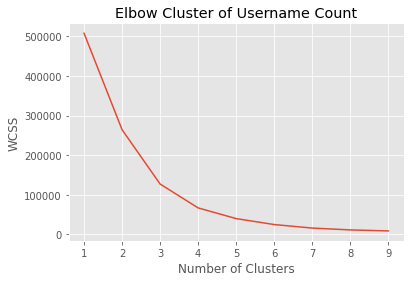

In [12]:
tools.ElbowClusterUsernameCount()

In [13]:
tools.CountUsernameDataFrameWithCluster()

Username Count  Cluster
10850     @tayyoung_:   480        1
70       @freebsdgirl   221        3
24     @MaxBlumenthal   160        3
138            @MT8_9   100        3
51     @IsraeliRegime    99        3
...               ...   ...      ...
5691     @CreaseyLuke     1        0
5692     @RHoward617:     1        0
5693     @RossBarnes9     1        0
5694   @Tom_Greenbean     1        0
13707  @CHILLShrammy:     1        0

[13708 rows x 3 columns]

In [14]:
tools.UsernameCountClusterCounter()

Counter({2: 1, 1: 15, 3: 206, 0: 13486})

In [15]:
tools.DisplayPieUsernameCluster()

In [16]:
tools.Top10UsernameBar()

Username which most appears in every tweet in our data is @tayyoung_ with 480 times. I try to make cluster based on number of username count. Based on elbow clustering method we can see that number of count supposed to clustered in 4 cluster. Cluster 1 is cluster with most frequently appears and only 1 username belongs to that cluster.

# **What is Most Frequently Appears Hashtag? Can We Clustered Them?**

In [17]:
tools.CountHastagDataframe()

Hashtag Count
3                       #MKR  1276
1                       #mkr  1152
283                   #Islam   131
1180         #BlameOneNotAll   107
335               #notsexist   101
...                      ...   ...
2011  #RejectedOlympicEvents     1
2012               #dumbslut     1
2013          #justobservant     1
2016                  #TGMVR     1
5144               #joeworld     1

[5145 rows x 2 columns]

[]

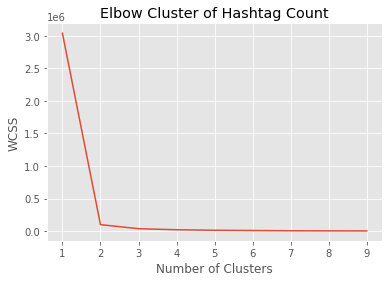

In [18]:
tools.ElbowClusterHashtagCount()

In [19]:
tools.CountHashtagDataFrameWithCluster()

Hashtag Count  Cluster
3                       #MKR  1276        1
1                       #mkr  1152        1
283                   #Islam   131        0
1180         #BlameOneNotAll   107        0
335               #notsexist   101        0
...                      ...   ...      ...
2011  #RejectedOlympicEvents     1        0
2012               #dumbslut     1        0
2013          #justobservant     1        0
2016                  #TGMVR     1        0
5144               #joeworld     1        0

[5145 rows x 3 columns]

In [20]:
tools.HashtagCountClusterCounter()

Counter({1: 2, 0: 5143})

In [21]:
tools.Top10Hashtag()

Based on clustering, we can see that hashtag supposed to clustered to 2 cluster. Most dominating hastag is MKR.

# **Can We Find Emojis in Every Tweet?**

In [22]:
tools.EmojiCounter()

Counter({'😘': 50,
         '❤': 7,
         '😌': 4,
         '🍋': 3,
         '😭': 9,
         '♥': 26,
         '❤️': 62,
         '👏': 25,
         '😁': 12,
         '🙏': 4,
         '😂': 65,
         '😏': 6,
         '😝': 2,
         '😒': 12,
         '😄': 5,
         '☹': 1,
         '©': 27,
         '🎁': 1,
         '☺': 6,
         '🙅': 7,
         '😍': 11,
         '👌': 11,
         '🎶': 5,
         '😷': 5,
         '😱': 8,
         '😰': 2,
         '😅': 3,
         '😜': 15,
         '😀': 2,
         '😩': 9,
         '😨': 1,
         '👍': 15,
         '👎': 10,
         '😉': 9,
         '💩': 4,
         '💔': 2,
         '🏀': 1,
         '💅': 1,
         '💁': 4,
         '😃': 6,
         '😔': 3,
         '😢': 1,
         '😐': 5,
         '😊': 22,
         '✌️': 2,
         '🙈': 1,
         '🙀': 1,
         '💉': 1,
         '😲': 1,
         '🔫': 5,
         '😦': 1,
         '😡': 13,
         '😋': 5,
         '🐚': 1,
         '😴': 2,
         '😓': 1,
         '™': 7,
         '👳': 

In [23]:
tools.DisplayPieChartEmoji()

Most dominating emoji is Laugh Emoji (8.3% in our data).

# **How About The Tweet Characters Length?**

In [24]:
tools.DataframeWithCharactersCount()

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

       Count  
0          9  
1         14  
2          9  
3         18  
4         18  
...      ...  
47687     43  
47688     45  
47689     21  
47690     15  
47691     14  

[47692 rows x 3 columns]

In [25]:
tools.CharactersBarCustom('sum')

In [26]:
tools.CharactersBarCustom('max')

In [27]:
tools.CharactersBarCustom('min')

# **Can We Measure 'Toxicness' in Every Tweet?**

Yes, one method that we can use is using Afinn Score. Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. In python, there is an in-built function for this lexicon. Low Afinn score indicated that it was a bad tweet, meanwhile more positive means good tweet.

In [28]:
tools.ApplyAfinScore()

tweet_text cyberbullying_type  \
44035  You so black and white trying to live like a n...          ethnicity   
45165  @hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...          ethnicity   
47037  @Purely_Ambition: Sooo mad. RT @TracePeterson ...          ethnicity   
41718  Fuck your bitch ass daddy. Piece of shit ass n...          ethnicity   
41739  Dumb dumb dumb dumb db dub dumb dumb stupid du...          ethnicity   
...                                                  ...                ...   
41230  AHHAAHAHHAHAHA Thank u smm hope I get to redra...          ethnicity   
43005  happy birthday to one of my first best friends...          ethnicity   
9323   Gay jokes aren’t funny. Racist jokes about bla...             gender   
8896   Rape jokes aren't funny Sexist jokes aren't fu...             gender   
43878  Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h...          ethnicity   

       Afin Sentence Score  
44035               -133.0  
45165               -110.0  
47037                -89.0  
41718                -74.0  
41739                -67.0  
...                    ...  
41230                 25.0  
43005                 27.0  
9323                  29.0  
8896                  29.0  
43878                 31.0  

[47692 rows x 3 columns]

In [29]:
tools.AfinScoreHistogram()

# **What is Most Toxic Tweet in Each Label?**

In [30]:
tools.Check2MostToxicTweet('ethnicity')

Number 1 Toxic Tweet by ethnicity is: You so black and white trying to live like a nigger... Pahahahaha... Common is dumb as fuck!
it's short for huntsman you dumb ass and he'll ya i am fuck gays and niggers #TrumpTrain#fuckgays
U were the first one to inspire me to dream...dream no matter how foolish those dreams seem to others. Thank u so much for that. Ur work has inspired all of us &amp; will continue to inspire generations to come. RIP Dr. Kalam
I wasn't comparing anything, Saying that a book is being used to opress lgbt people now and black people in the past isn't a comparison It's a statement that they both got oppressed due to the same book , not trying to compare struggles but saying the Bible is the common denom.
@in_JEpan: Fuck @FemaleJawan for almost tripping me in the Hallway, DUMB HO NIGGER BISH. &lt; you sound a little mad. Lmaoooo.
LOL ! this bitch looks dumb as FUCK now that she already agreed to marry this nigger but then find's out he fucked 20 other bitches.
Young 

In [31]:
tools.Check2MostToxicTweet('other_cyberbullying')

Number 1 Toxic Tweet by other_cyberbullying is: is feminazi an actual word with a denot…
@Nasharchy my job means protecting people. even the people i don't agree with/like.
They barely cooked anything on that entrée #MKR
RT @kf: Like, no. If a community fostering jerks prevents users from adopting that community's code, it is very much a technical problem.
It's almost time. :)
@JamesGweenwood shock youre bullying me again.
@LionLionEatEat yeah, someone DMed me a screenshot. meh. let her. i have no idea who she even is.
For more egregious cases for harassment, we definitely need to be able to respond to those appropriately. But most toxicity isn't this.
So, this happened. http://t.co/ZPTRtsYFiV
@Nibelsnarfabarf @srhbutts @GRIMACHU it is really funny all the assumptions they make about how it works - and how much they are wrong.
The lack of self-awareness from @wadhwa right now is staggering and hilarious. #stopwadhwa2015
Hahahaha http://t.co/JRPkJCNVH9
This is going to be a better final

In [32]:
tools.Check2MostToxicTweet('gender')

Number 1 Toxic Tweet by gender is: don't make rape jokes!!! don't make gay jokes!!! oh but fat jokes are okay they don't cause depression and possible suicide or anything
@RepTedYoho Did you call female member of government, AOC, “fucking bitch”? @HouseAgGOP @HouseForeignGOP @HouseAdmnGOP @HouseForeign @HouseGOP @SpeakerPelosi @AOC
@YourAnonCentral Why is rape always the example used ? Why not say lynching jokes, or drag a gay man behind a truck joke ? Think a little.
Who is worse for FL? @marcorubio who can’t tell the difference between 2 black leaders, @RepTedYoho who calls a female a fucking bitch for no reason, or @GovRonDeSantis for letting Floridians suffer and die because he is too incompetent to lead?
The Miseducation of the American Boy: Why boys crack up at rape jokes, think having a girlfriend is “gay,” and still can’t cry—and why we need to give them new and better models of masculinity https://bit.ly/2RhOXD7 via @TheAtlantic @peggyorenstein #boyhoodstudies
I pull gay nicca

In [33]:
tools.Check2MostToxicTweet('age')

Number 1 Toxic Tweet by age is: I am so sorry this happened to you and any other girl that was terrorized by his disgusting ass. For what it’s worth, I bullied him in high school because I always fucking hated him for being an annoying gross ass fucking creep.

Number 2 Toxic Tweet by age is: Oomfs i’m sorry I’m suddenly get so mad after seeing that thread. Don’t get me wrong i use to get bully and it even make me don’t want to go to school, BULLYING AIN’T A JOKE DON’T FUCKING MAKE YOURSELF FAMOUSE CUS YOU’RE BULLY, U SUCK ASS NASTY BITCH



In [34]:
tools.Check2MostToxicTweet('religion')

Number 1 Toxic Tweet by religion is: BLACK SKINS ONLY RACIST POS! U ILLITERATE RICH SLAVE MASTERS OF STUPID AF USA, THE @COWBOYS KILLED @Redskins &amp; THE NORTH KILLED THE BLACKS DURING CIVIL WAR! SO YOU GOD-Damned (damned by God) IDIOTS, U JUST TOOK DOWN THE WRONG FLAG &amp; TEAMS! DUMBA** @TheDemocrats Muslim terrorist!

Number 2 Toxic Tweet by religion is: 39 Indians dead! Killed by those bloody terrorists who suck and are the most disgusting organisms on Earth. Earth is ashamed of having such animals. They do crime in the name of jihad why are they still alive? Humanity is dying and these fucking animals are winning



In [35]:
tools.Check2MostToxicTweet('not_cyberbullying')

Number 1 Toxic Tweet by not_cyberbullying is: But seriously, I hate Angelica! Dumb bitch always bullying Tommy, Chuckie, Phil & Lil. She be salty as shit when Susie comes shut shit DOWN!

Number 2 Toxic Tweet by not_cyberbullying is: He embellished the afternoon with moustachioed feints &amp; flicks. By throwing him an England shirt Mercer made a statement about the game
Zoe is rocking the stage. http://t.co/mpXlDSBPBh
ANOTHER home visits round?! i'm literally fucking done #MKR
Today has finally arrived #GKMC
IM FUCKING GOING TO SAN FRANCISCO ON TUESDAY!!!!!!!!!!!!
IM ON THE EDGE... OF GLORY
@nizarnayouf There were no US commandos.
I hate these girls, far out. #mkr
RT @Oh_tobs: Bless I totally forgot about the party favourite Shaz... #MKR
I went old school and changed my other account's name back to @StaceGots which was my original Twitter name back in 08/09.
@GladysMcGee18 +FACE THE DREGS OF HUMANITY, SEE HOW TRULY FOUL THEY ARE AND FIGHT BACK
So FUCK ROBERT A DOUGLASS
Bully beatdown 

# **What is Most Frequently Words Appears on Tweet?**

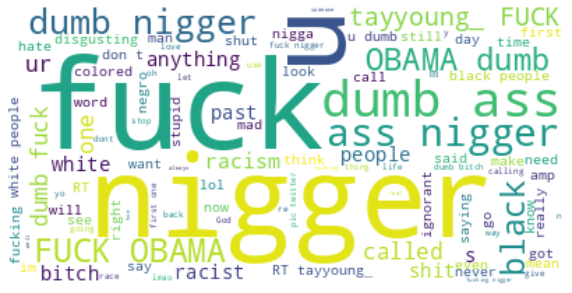

In [36]:
tools.VisualizeWordCloud('ethnicity')

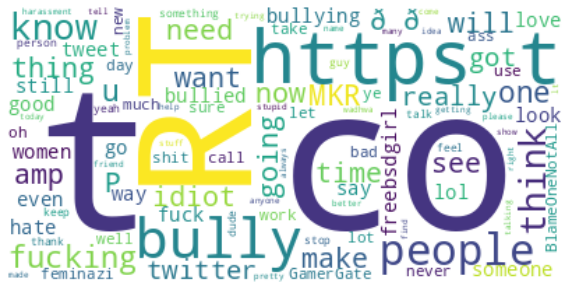

In [37]:
tools.VisualizeWordCloud('other_cyberbullying')

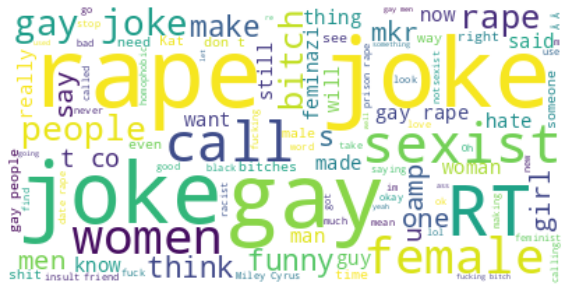

In [38]:
tools.VisualizeWordCloud('gender')

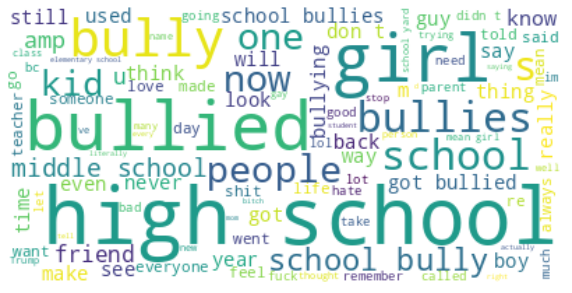

In [39]:
tools.VisualizeWordCloud('age')

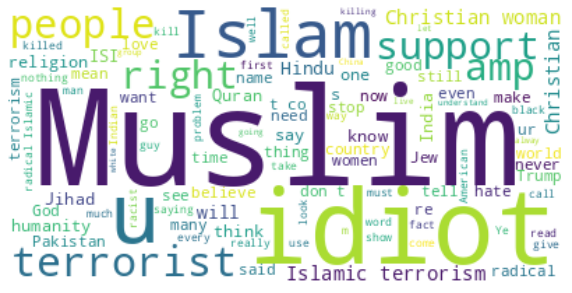

In [40]:
tools.VisualizeWordCloud('religion')

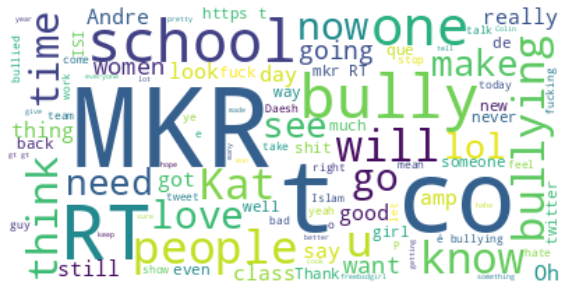

In [41]:
tools.VisualizeWordCloud('not_cyberbullying')

# **Data Preprocessing & Label Encoding**

In [42]:
tools.LabelEncoding()

Removing @ Total : 25582
Removing # Total : 10984
Removing http Total : 4584


tweet_text cyberbullying_type  \
0             in other words your food was crapilicious!  not_cyberbullying   
1                                       why is so white?  not_cyberbullying   
2           a classy whore? or more red velvet cupcakes?  not_cyberbullying   
3      meh. :p thanks for the heads up, but not too c...  not_cyberbullying   
4      this is an isis account pretending to be a kur...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl aren't expected to do anything, depe...          ethnicity   
47688  turner did not withhold his disappointment. tu...          ethnicity   
47689  i swear to god. this dumb nigger bitch. i have...          ethnicity   
47690  yea fuck you rt if youre a nigger fucking unfo...          ethnicity   
47691  bro. u gotta chill rt dog fuck kp that dumb ni...          ethnicity   

       cyberbullying_type_encoding  
0                                3  
1                                3  
2                                3  
3                                3  
4                                3  
...                            ...  
47687                            1  
47688                            1  
47689                            1  
47690                            1  
47691                            1  

[47692 rows x 3 columns]

In [43]:
tools.LabelMapping_

{'age': 0,
 'ethnicity': 1,
 'gender': 2,
 'not_cyberbullying': 3,
 'other_cyberbullying': 4,
 'religion': 5}

I removed words starts with @, #, and also http. It means will removed username, hashtag, and also linked that attached in tweet.

# **Train Test Splitting & Vectorizing**

In [44]:
tools.Vectorizer()

Removing @ Total : 25582
Removing # Total : 10984
Removing http Total : 4584


In [45]:
tools.TrainSenctence

<35769x34890 sparse matrix of type '<class 'numpy.int64'>'
	with 694129 stored elements in Compressed Sparse Row format>

In [46]:
tools.TestSentence

<11923x34890 sparse matrix of type '<class 'numpy.int64'>'
	with 224990 stored elements in Compressed Sparse Row format>

In [47]:
tools.TrainY

array([2, 4, 0, ..., 3, 3, 1])

In [48]:
tools.TestY

array([4, 4, 0, ..., 2, 0, 1])

In order to proceed text data into modelling, after cleansing we need to do vectorizing.

![](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0408.png)

# **Model Pipeline**

Removing @ Total : 25582
Removing # Total : 10984
Removing http Total : 4584


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[05:14:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2022-02-01 05:15:03.542229: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 174455    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 36        
Total params: 174,491
Trainable params: 174,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 5), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.

2022-02-01 05:15:04.556717: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3577/3577 [==============================] - 16s 4ms/step - loss: 0.2273 - accuracy: 0.7030 - val_loss: 0.1420 - val_accuracy: 0.7855
Epoch 2/10
3577/3577 [==============================] - 12s 3ms/step - loss: 0.1268 - accuracy: 0.8128 - val_loss: 0.1319 - val_accuracy: 0.7995
Epoch 3/10
3577/3577 [==============================] - 13s 3ms/step - loss: 0.1100 - accuracy: 0.8532 - val_loss: 0.1293 - val_accuracy: 0.8132
Epoch 4/10
3577/3577 [==============================] - 12s 3ms/step - loss: 0.0960 - accuracy: 0.8802 - val_loss: 0.1323 - val_accuracy: 0.8112
Epoch 5/10
3577/3577 [==============================] - 13s 4ms/step - loss: 0.0850 - accuracy: 0.8964 - val_loss: 0.1392 - val_accuracy: 0.8125
Epoch 6/10
3577/3577 [==============================] - 14s 4ms/step - loss: 0.0765 - accuracy: 0.9060 - val_loss: 0.1482 - val_accuracy: 0.8126
Epoch 7/10
3577/3577 [==============================] - 13s 4ms/step - loss: 0.0702 - accuracy: 0.9137 - val_loss: 0.1566 - val_accuracy: 0.8

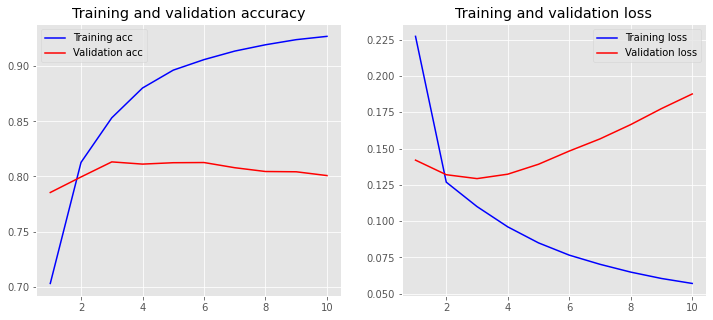

In [49]:
Eval = tools.ModelPipeline()

In [50]:
Eval

Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.809360   0.816488  0.809360  0.812462
1          XGB Classifier  0.820096   0.829113  0.820096  0.823191
2  Naive Bayes Classifier  0.736308   0.723307  0.736308  0.708342
3          Neural Network  0.720121   0.808795  0.752411  0.778392

In [51]:
tools.LogisticRegressionModel_

LogisticRegression(max_iter=1000)

In [52]:
tools.XGBClassifierModel_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
tools.NaiveBayesClassifier_

MultinomialNB()

In [54]:
tools.NeuralNetworkModel_

For model pipeline i used Logistic Regression, XGB Classifier, Naive Bayes Classifier, and Neural Network. After testing on test data, XGB Classifier seems have good performace (Accuracy, Precision, Recall and F1 Score) compared to other algorithm.

# **How Our Model Perform on Testing Data?**

In [55]:
tools.EvalVisualization(Eval, 'Accuracy')

In [56]:
tools.EvalVisualization(Eval, 'Precision')

In [57]:
tools.EvalVisualization(Eval, 'Recall')

In [58]:
tools.EvalVisualization(Eval, 'F1 Score')

# **Model Blind Test**

In [59]:
Sentence = 'Lets not spread bullying all over the world!'

In [60]:
tools.PredictTweet(tools.XGBClassifierModel_, Sentence)

This Tweet:
Lets not spread bullying all over the world!
Predicted as not_cyberbullying tweet


In [61]:
tools.PredictTweet(tools.LogisticRegressionModel_, Sentence)

This Tweet:
Lets not spread bullying all over the world!
Predicted as not_cyberbullying tweet


In [62]:
tools.PredictTweet(tools.NaiveBayesClassifier_, Sentence)

This Tweet:
Lets not spread bullying all over the world!
Predicted as not_cyberbullying tweet


In [63]:
tools.PredictTweet(tools.NeuralNetworkModel_, Sentence)

This Tweet:
Lets not spread bullying all over the world!
Predicted as not_cyberbullying tweet


# **Conclusion**

Please keep your word on social media. Let's stop this bullying chain. We don't know whether the person we are bullying is mentally strong or not right? Thank you for visiting my Notebook, don't forget to upvote :)!